In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import community
from collections import Counter


def parseDataset(path):
    df = pd.read_table(path, delimiter='\t', names=['source','target'])
    return df

In [27]:
#Graph creation
dataset_path= "dataset.txt"
data = parseDataset(dataset_path)
G= nx.from_pandas_edgelist(data,"source","target")

In [28]:
#generic analysis
print(G)


Graph with 58228 nodes and 214078 edges


In [60]:
#distances analysis (ci metterà una vita, la giant component richiederà ore)
'''
distances_sum = 0
all_p = []
for C in (G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=True)):
    p = dict(nx.shortest_path_length(C)) #questo conterrà tutte le distanze, per poter guardare max, min e media
    all_p.append(p)
    distance = nx.average_shortest_path_length(C)
    print(distance)
    distances_sum += distance

print("Average distance: ", distances_sum/len(nx.connected_components(G)))
'''

'\ndistances_sum = 0\nall_p = []\nfor C in (G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=True)):\n    p = dict(nx.shortest_path_length(C)) #questo conterrà tutte le distanze, per poter guardare max, min e media\n    all_p.append(p)\n    distance = nx.average_shortest_path_length(C)\n    print(distance)\n    distances_sum += distance\n\nprint("Average distance: ", distances_sum/len(nx.connected_components(G)))\n'

In [30]:
#clustering coefficient
print("Clustering coefficient: "+str(nx.average_clustering(G)))


Clustering coefficient: 0.17232592744613273


Il grafo è connesso? False
Componenti connesse: 547
largest connected component size: 56739
[56739, 49, 11, 11, 10, 10, 9, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

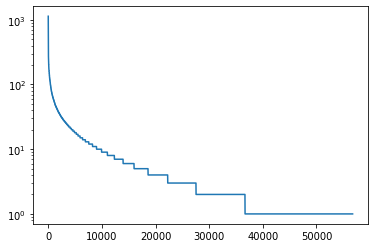

In [31]:
#largest connected component
print("Il grafo è connesso? "+str(nx.is_connected(G)))
print("Componenti connesse: "+ str(nx.number_connected_components(G)))
core_nodes = max(nx.connected_components(G), key=len)
print(f"largest connected component size: {len(core_nodes)}")
core = G.subgraph(core_nodes)
print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

#analizzo i degree all'interno della sola largest connected components per scoprire se la sua dimensione è dovuta a molti nodi che si incontrano oppure a supernodi Hub
largest_component = G.subgraph(core_nodes).copy()
core_degree_sequence = sorted([d for n, d in largest_component.degree()], reverse=True)  # degree sequence
plt.yscale('log')
plt.plot(core_degree_sequence)
#nx.draw(core, with_labels=True)

average degree: 7.353094731057223
21157
degree sequence: [1134, 1055, 854, 838, 833, 779, 732, 569, 550, 475, 467, 453, 448, 404, 386, 379, 354, 343, 337, 334, 333, 332, 327, 326, 325, 321, 311, 310, 306, 301, 299, 296, 292, 289, 282, 274, 272, 271, 270, 270, 270, 267, 267, 266, 264, 259, 257, 256, 254, 253, 253, 248, 242, 241, 230, 230, 228, 228, 228, 227, 226, 225, 225, 221, 218, 218, 215, 214, 214, 213, 213, 212, 211, 210, 210, 210, 210, 209, 207, 206, 206, 205, 204, 203, 202, 202, 202, 201, 201, 198, 198, 194, 193, 192, 192, 191, 190, 190, 190, 190, 190, 189, 188, 188, 187, 186, 185, 184, 184, 183, 181, 180, 179, 178, 178, 177, 176, 176, 175, 175, 175, 174, 173, 173, 173, 173, 173, 172, 172, 172, 172, 172, 172, 171, 171, 170, 170, 169, 168, 168, 168, 168, 168, 167, 167, 166, 166, 166, 165, 164, 163, 163, 163, 163, 162, 162, 162, 162, 162, 162, 161, 161, 161, 160, 160, 160, 160, 159, 158, 158, 157, 156, 155, 155, 153, 153, 153, 153, 152, 151, 151, 150, 150, 150, 149, 149, 149, 149, 

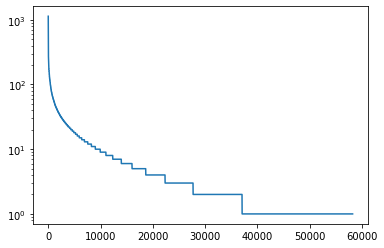

In [43]:
#degree analysis
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
plt.yscale('log')
plt.plot(degree_sequence)

print("average degree: " + str(sum(degree_sequence)/len(degree_sequence)))
#wtf? average degree 7?
print(degree_sequence.count(min(degree_sequence)))
#ah, ecco perchè.

print("degree sequence: " + str(degree_sequence))

In [33]:
#Degree correlation
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(G)))
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(largest_component)))

Degree correlation: 0.010815796314560602
Degree correlation: 0.009622679947904226


In [34]:
#community detection
#communities = community_louvain.best_partition(G)
largest_component_communities = community.community_louvain.best_partition(largest_component)
# number of communities
#print(Counter(communities.values()))
print(Counter(largest_component_communities.values()))


Counter({1: 8020, 0: 5858, 4: 3932, 19: 3597, 14: 3142, 9: 2910, 7: 2216, 13: 1781, 16: 1717, 11: 1619, 6: 1596, 18: 1460, 12: 1262, 2: 1204, 24: 1088, 41: 841, 22: 757, 20: 750, 37: 747, 10: 691, 40: 653, 26: 623, 44: 603, 51: 589, 5: 576, 15: 559, 17: 537, 23: 502, 25: 502, 8: 479, 39: 436, 32: 432, 31: 426, 27: 425, 42: 394, 29: 392, 49: 327, 59: 320, 21: 255, 33: 254, 56: 229, 68: 215, 45: 187, 28: 182, 46: 130, 36: 105, 57: 99, 47: 83, 52: 79, 55: 77, 38: 67, 3: 62, 62: 40, 80: 40, 30: 22, 76: 20, 72: 18, 75: 16, 97: 14, 64: 13, 73: 13, 105: 13, 78: 12, 82: 12, 134: 12, 66: 11, 107: 11, 131: 11, 136: 11, 138: 11, 67: 10, 92: 10, 98: 10, 118: 10, 119: 10, 142: 10, 34: 9, 53: 9, 95: 9, 99: 9, 129: 9, 143: 9, 69: 7, 70: 7, 83: 7, 100: 7, 144: 7, 71: 6, 87: 6, 88: 6, 91: 6, 110: 6, 111: 6, 114: 6, 122: 6, 137: 6, 139: 6, 148: 6, 152: 6, 35: 5, 50: 5, 60: 5, 61: 5, 77: 5, 79: 5, 84: 5, 90: 5, 93: 5, 102: 5, 112: 5, 115: 5, 116: 5, 126: 5, 128: 5, 140: 5, 141: 5, 145: 5, 150: 5, 153: 5,

'si nota subito una grossa comunità centrale (la 1) ma è interessante anche notare che c\'è un cluster di comunità che fungono da "intermediari"\ntra le comunità di sinistra e quelle di destra. la 1 è assolutamente un hub (ed è la comunità più grossa),ma le altre nel mezzo permettono il collegamento.\n'

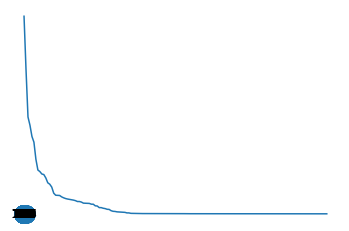

In [41]:
#plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#TODO: aggiustare la dimensione dell'immagine, se si decommenta la linea precedente il grafo delle comunità diventa un amoung us
#per ignorare quelle da due è meglio valutare solo la largest_component
induced_graph = community.induced_graph(largest_component_communities, largest_component, weight='WEIGHT')
induced_graph.remove_edges_from(nx.selfloop_edges(induced_graph))

nx.draw(induced_graph, with_labels=True, pos=nx.spring_layout(induced_graph))
'''si nota subito una grossa comunità centrale (la 1) ma è interessante anche notare che c'è un cluster di comunità che fungono da "intermediari"
tra le comunità di sinistra e quelle di destra. la 1 è assolutamente un hub (ed è la comunità più grossa),ma le altre nel mezzo permettono il collegamento.
'''

In [47]:
#centrality analysis
#troppo grande per nx.closeness_centrality(G)
print("betweenness centrality: "+str(sum(nx.betweenness_centrality(G,k=100).values())/58228))
#sarebbe interessante valutare la betwenness di alcuni nodi particolari

betweenness centrality: 6.408827491326789e-05


average degree: 7.353094731057223
21157
degree sequence: [1134, 1055, 854, 838, 833, 779, 732, 569, 550, 475, 467, 453, 448, 404, 386, 379, 354, 343, 337, 334, 333, 332, 327, 326, 325, 321, 311, 310, 306, 301, 299, 296, 292, 289, 282, 274, 272, 271, 270, 270, 270, 267, 267, 266, 264, 259, 257, 256, 254, 253, 253, 248, 242, 241, 230, 230, 228, 228, 228, 227, 226, 225, 225, 221, 218, 218, 215, 214, 214, 213, 213, 212, 211, 210, 210, 210, 210, 209, 207, 206, 206, 205, 204, 203, 202, 202, 202, 201, 201, 198, 198, 194, 193, 192, 192, 191, 190, 190, 190, 190, 190, 189, 188, 188, 187, 186, 185, 184, 184, 183, 181, 180, 179, 178, 178, 177, 176, 176, 175, 175, 175, 174, 173, 173, 173, 173, 173, 172, 172, 172, 172, 172, 172, 171, 171, 170, 170, 169, 168, 168, 168, 168, 168, 167, 167, 166, 166, 166, 165, 164, 163, 163, 163, 163, 162, 162, 162, 162, 162, 162, 161, 161, 161, 160, 160, 160, 160, 159, 158, 158, 157, 156, 155, 155, 153, 153, 153, 153, 152, 151, 151, 150, 150, 150, 149, 149, 149, 149, 

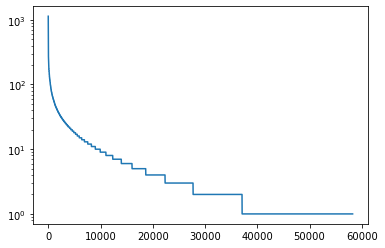

In [28]:
#degree analysis
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
plt.yscale('log')
plt.plot(degree_sequence)

print("average degree: " + str(sum(degree_sequence)/len(degree_sequence)))
#wtf? average degree 7?
print(degree_sequence.count(min(degree_sequence)))
#ah, ecco perchè.

print("degree sequence: " + str(degree_sequence))

In [29]:
#Degree correlation
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(G)))
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(largest_component)))

Degree correlation: 0.010815796314560533
Degree correlation: 0.009622679947904035


Counter({1: 8289, 5: 7684, 3: 4434, 19: 3710, 0: 3082, 38: 1865, 15: 1772, 6: 1580, 10: 1444, 2: 1364, 14: 1351, 18: 1251, 9: 1248, 24: 1137, 17: 1007, 7: 994, 22: 901, 44: 885, 20: 846, 42: 795, 16: 775, 39: 737, 11: 734, 40: 616, 13: 589, 31: 553, 26: 543, 21: 524, 50: 502, 28: 475, 37: 456, 23: 449, 32: 427, 55: 405, 8: 309, 12: 273, 41: 224, 43: 209, 33: 194, 25: 172, 60: 151, 58: 141, 49: 133, 36: 103, 47: 100, 27: 88, 57: 82, 52: 72, 85: 57, 30: 50, 73: 40, 94: 40, 4: 32, 62: 25, 29: 22, 88: 22, 83: 18, 48: 13, 74: 13, 124: 13, 161: 12, 78: 11, 89: 11, 128: 11, 164: 11, 166: 11, 79: 10, 107: 10, 148: 10, 172: 10, 34: 9, 110: 9, 114: 9, 115: 9, 140: 9, 143: 9, 157: 9, 173: 9, 51: 8, 112: 8, 130: 8, 132: 8, 158: 8, 184: 8, 80: 7, 81: 7, 96: 7, 97: 7, 99: 7, 117: 7, 163: 7, 174: 7, 54: 6, 64: 6, 71: 6, 82: 6, 102: 6, 103: 6, 106: 6, 135: 6, 136: 6, 138: 6, 141: 6, 150: 6, 165: 6, 167: 6, 180: 6, 188: 6, 35: 5, 56: 5, 61: 5, 63: 5, 69: 5, 93: 5, 98: 5, 105: 5, 108: 5, 119: 5, 121: 5,

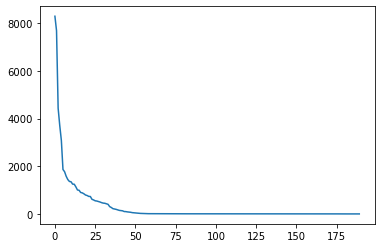

In [34]:
#community detection
#communities = community_louvain.best_partition(G)
largest_component_communities = community_louvain.best_partition(largest_component)
# number of communities
#print(Counter(communities.values()))
print(Counter(largest_component_communities.values()))
plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#per ignorare quelle da due è meglio valutare solo la largest_component